# A Quantitative Analysis of the Stock Market

We will be performing a <b>quantitative analysis</b> of five well known stocks and answer a few questions that will assist in the selection process of a wonderful stock; personal investment style is risk adverse.

>note: Risk-averse investors prioritize the safety of principal over the possibility of a higher return on their money. 



We will be taking a look at 5 well know stocks that fall within the Restaurants industry; Consumer Cyclical sector;
- <b>MCD</b>    McDonalds
- <b>SBUX</b>   Starbucks
- <b>CMG</b>    Chipotle Mexican Grill
- <b>YUM</b>    Yum! Brands
- <b>DRI</b>    Darden Restaurants



## To perform a quantitative analysis we will explore the below statistical concepts:

<p>
<b> 1.Descriptive Statistics: </b>      Summary statistics (mean, median, standard deviation, etc.) for each stock.<br>
  
<b> 2.Time Series Analysis:</b>         Trends and patterns over time, especially for closing prices.<br>

<b> 3.Volatility Analysis:</b>          How much the stock price fluctuates over a period.<br>

<b> 4.Correlation Analysis:</b>         How stock prices of different companies are related to each other.<br>

<b> 5.Comparative Analysis:</b>         Comparing the performance of different stocks.<br>

<b> 6.Risk-Return Trade-off Analysis:</b>  Analyzing the balance between the potential risks and rewards of different stocks,                                       aiding in portfolio management.<br>
    
 We will also compare the performance of the selected stocks against relevant benchmarks, such as market indices like the S&P 500.<br>  

In [1]:
# importing Libraries 
  
import pandas as pd 
import seaborn as sns
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt 

# setting default style for all plots
plt.style.use('ggplot') 

%matplotlib inline 

In [2]:
 start_date = datetime.now() - pd.DateOffset(months=12)
 end_date = datetime.now()

 tickers = ['MCD', 'SBUX', 'CMG', 'YUM', 'DRI']

 df_list = []

 for ticker in tickers:
  data = yf.download(ticker, start=start_date, end=end_date)
  df_list.append(data)

 df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Lets display the first few rows of the dataset
df.head()

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
MCD    2023-03-20  267.839996  271.380005  267.839996  270.739990  264.768402   
       2023-03-21  270.000000  270.869995  267.619995  270.209991  264.250061   
       2023-03-22  270.040009  271.980011  267.709991  267.869995  261.961700   
       2023-03-23  267.989990  271.480011  267.989990  269.619995  263.673096   
       2023-03-24  270.369995  271.829987  268.839996  271.329987  265.345367   

                    Volume  
Ticker Date                 
MCD    2023-03-20  2108900  
       2023-03-21  3120100  
       2023-03-22  2240800  
       2023-03-23  2263800  
       2023-03-24  2229200

In [4]:
# Lets display a random sample of five rows
df.sample(5)

,,Open,High,Low,Close,Adj Close,Volume
Ticker,Date,,,,,,
CMG,2023-11-08,2066.600098,2089.889893,2059.500000,2084.000000,2084.000000,181200
MCD,2023-10-20,258.959991,260.339996,257.559998,258.109985,255.121109,3778200
SBUX,2023-10-03,90.500000,91.070000,89.209999,89.480003,88.458786,6666600
CMG,2023-06-08,2014.260010,2040.819946,2014.260010,2023.229980,2023.229980,194400
YUM,2023-05-31,127.709999,128.899994,126.910004,128.690002,126.852058,7448300


In [5]:
# Lets display the last few rows of the dataset
df.tail()

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
DRI    2024-03-13  172.800003  175.410004  172.800003  174.570007  174.570007   
       2024-03-14  174.410004  174.699997  170.750000  171.770004  171.770004   
       2024-03-15  170.919998  173.800003  170.919998  171.960007  171.960007   
       2024-03-18  171.000000  173.750000  171.000000  172.869995  172.869995   
       2024-03-19  173.139999  174.425003  172.660004  173.649994  173.649994   

                    Volume  
Ticker Date                 
DRI    2024-03-13  1080500  
       2024-03-14   889900  
       2024-03-15  2552500  
       2024-03-18  1195900  
       2024-03-19   735393

In [6]:
# Lets change the amount of decimals being displayed for an easier read
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# The stock prices are now showing two decimal places
df

Open   High    Low  Close  Adj Close   Volume
Ticker Date                                                      
MCD    2023-03-20 267.84 271.38 267.84 270.74     264.77  2108900
       2023-03-21 270.00 270.87 267.62 270.21     264.25  3120100
       2023-03-22 270.04 271.98 267.71 267.87     261.96  2240800
       2023-03-23 267.99 271.48 267.99 269.62     263.67  2263800
       2023-03-24 270.37 271.83 268.84 271.33     265.35  2229200
...                  ...    ...    ...    ...        ...      ...
DRI    2024-03-13 172.80 175.41 172.80 174.57     174.57  1080500
       2024-03-14 174.41 174.70 170.75 171.77     171.77   889900
       2024-03-15 170.92 173.80 170.92 171.96     171.96  2552500
       2024-03-18 171.00 173.75 171.00 172.87     172.87  1195900
       2024-03-19 173.14 174.43 172.66 173.65     173.65   735393

[1260 rows x 6 columns]

## Descriptive Statistics

In [8]:
# Descriptive Statistics for each stock
descriptive_stats = df.groupby('Ticker')['Close'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
CMG,252.00,2097.45,278.77,1610.23,1874.76,2058.31,2243.40,2792.85
DRI,252.00,157.77,9.16,134.00,151.26,160.18,164.28,175.89
MCD,252.00,284.25,12.45,246.19,279.72,288.49,293.34,300.53
SBUX,252.00,98.35,5.22,89.48,93.87,97.88,101.62,114.56
YUM,252.00,131.09,5.61,116.25,127.77,130.58,135.93,142.90


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1: </h1>
<b> Which stock has the highest average closing price? What is the average closing price for each stock, standard deviation and how do these stocks compare?</b>
</div> 

CMG (Chipotle Mexican Grill Inc.)
CMG shows the highest average closing price (<b>2097.45</b>) among these stocks and the highest standard deviation (<b>278.77</b>), indicating the most significant price fluctuation.

DRI (Darden Restaurants Inc.)
The average closing price is <b>157.77</b>, with a standard deviation of <b>9.16</b>.

MCD (McDonald's Corportation)
The average closing price is <b>284.25</b>, with a standard deviation of <b>12.45</b>, indicting more variability in closing prices compared to DRI, SBUX and YUM.

SBUX (Starbucks Corporation)
The average closing price is <b>98.35</b>, with a standard deviation of <b>5.22</b>, which has the smallest fluctuation in closing prices out of all the stocks.

YUM (Yum! Brands Inc.)
The average closing price is <b>131.09</b>, with a standard deviation of <b>5.61</b>.

Overall, SBUX and YUM show modest growth with slight fluctuation in closing prices, DRI shows a bit more variability followed by MCD, but it is CMG which has the most price fluctuation out of all the stocks.

In [9]:
# Lets now reset the index, rename dataset so we can answer a few more questions
df.reset_index(inplace=True)
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,MCD,2023-03-20,267.84,271.38,267.84,270.74,264.77,2108900
1,MCD,2023-03-21,270.00,270.87,267.62,270.21,264.25,3120100
2,MCD,2023-03-22,270.04,271.98,267.71,267.87,261.96,2240800
3,MCD,2023-03-23,267.99,271.48,267.99,269.62,263.67,2263800
4,MCD,2023-03-24,270.37,271.83,268.84,271.33,265.35,2229200
...,...,...,...,...,...,...,...,...
1255,DRI,2024-03-13,172.80,175.41,172.80,174.57,174.57,1080500
1256,DRI,2024-03-14,174.41,174.70,170.75,171.77,171.77,889900
1257,DRI,2024-03-15,170.92,173.80,170.92,171.96,171.96,2552500
1258,DRI,2024-03-18,171.00,173.75,171.00,172.87,172.87,1195900


In [10]:
# Lets take a look at the columns
df.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [11]:
# lets rename the dataset
restaurants = df[['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'   ]]

In [12]:
# Lets see what the closing price for each stock is on 2024-03-19
restaurants.loc[ restaurants['Date'] == '2024-03-19']

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
251,MCD,2024-03-19,279.20,284.37,278.58,283.15,283.15,2661438
503,SBUX,2024-03-19,91.00,91.90,90.87,91.72,91.72,3823757
755,CMG,2024-03-19,2780.00,2798.33,2753.60,2792.85,2792.85,104138
1007,YUM,2024-03-19,136.43,137.39,135.90,137.21,137.21,799427
1259,DRI,2024-03-19,173.14,174.43,172.66,173.65,173.65,735393


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2: </h1>
<b>What is the closing price for each stock as of 03-19-2024?</b>
</div>

MCD (McDonald's Corportation)
On 03-19-2024 the closing price is <b>283.15</b>.

SBUX (Starbucks Corporation)
On 03-19-2024 the closing price is <b>91.72</b>.

CMG (Chipotle Mexican Grill Inc.)
On 03-19-2024 the closing price is <b>2792.85</b>.

YUM (Yum! Brands Inc.)
On 03-19-2024 the closing price is <b>137.21</b>.

DRI (Darden Restaurants Inc.)
On 03-19-2024 the closing price is <b>173.65</b>.

In [13]:
# Lets see What the minimum closing price for CMG is and on what trading day it occured
restaurants[restaurants['Ticker'] == 'CMG'].sort_values(by='Close')

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
504,CMG,2023-03-20,1604.80,1615.00,1592.30,1610.23,1610.23,259500
506,CMG,2023-03-22,1624.43,1661.44,1620.02,1622.47,1622.47,230500
508,CMG,2023-03-24,1636.01,1640.71,1609.13,1624.25,1624.25,228400
505,CMG,2023-03-21,1617.12,1629.44,1614.43,1627.96,1627.96,209700
507,CMG,2023-03-23,1637.00,1661.00,1620.41,1632.53,1632.53,200600
...,...,...,...,...,...,...,...,...
751,CMG,2024-03-13,2720.67,2738.13,2702.06,2722.69,2722.69,189700
752,CMG,2024-03-14,2766.56,2775.66,2725.00,2748.52,2748.52,211100
753,CMG,2024-03-15,2727.63,2758.40,2717.99,2756.39,2756.39,236600
754,CMG,2024-03-18,2768.07,2813.99,2764.01,2773.53,2773.53,189500


In [14]:
# Lets see What the minimum closing price for DRI is and on what trading day it occured
restaurants[restaurants['Ticker'] == 'DRI'].sort_values(by='Close')

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
1152,DRI,2023-10-13,133.91,134.77,133.36,134.00,132.93,1340000
1151,DRI,2023-10-12,138.01,138.01,133.75,134.25,133.18,1102300
1147,DRI,2023-10-06,139.41,139.86,136.41,136.94,135.85,1597800
1148,DRI,2023-10-09,135.94,137.49,135.14,137.08,135.98,1209500
1150,DRI,2023-10-11,138.30,138.54,136.28,137.52,136.42,1125800
...,...,...,...,...,...,...,...,...
1259,DRI,2024-03-19,173.14,174.43,172.66,173.65,173.65,735393
1248,DRI,2024-03-04,172.50,176.84,171.98,174.05,174.05,1542000
1249,DRI,2024-03-05,173.80,176.08,173.44,174.41,174.41,899000
1255,DRI,2024-03-13,172.80,175.41,172.80,174.57,174.57,1080500


In [15]:
# Lets see What the minimum closing price for MCD is and on what trading day it occured
restaurants[restaurants['Ticker'] == 'MCD'].sort_values(by='Close')

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
143,MCD,2023-10-12,251.69,252.15,245.88,246.19,243.34,3528300
139,MCD,2023-10-06,250.00,250.82,245.73,248.22,245.35,5129500
144,MCD,2023-10-13,246.82,248.81,246.00,248.31,245.43,2646500
140,MCD,2023-10-09,247.72,249.99,247.26,249.92,247.03,2782300
145,MCD,2023-10-16,249.22,250.49,248.07,249.94,247.05,2774700
...,...,...,...,...,...,...,...,...
211,MCD,2024-01-22,300.95,302.39,297.74,298.41,296.72,3250200
71,MCD,2023-06-30,295.14,299.10,294.89,298.41,293.38,2644700
212,MCD,2024-01-23,297.44,300.21,297.13,300.05,298.35,1874000
213,MCD,2024-01-24,300.00,302.04,299.31,300.44,298.74,3209700


In [16]:
# Lets see What the minimum closing price for SBUX is and on what trading day it occured
restaurants[restaurants['Ticker'] == 'SBUX'].sort_values(by='Close')

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
388,SBUX,2023-10-03,90.50,91.07,89.21,89.48,88.46,6666600
501,SBUX,2024-03-15,91.60,92.02,90.10,90.12,90.12,18133600
495,SBUX,2024-03-07,91.62,91.76,90.31,90.95,90.95,8792400
502,SBUX,2024-03-18,90.75,91.43,90.53,91.01,91.01,7413900
496,SBUX,2024-03-08,90.62,91.53,90.60,91.06,91.06,7671500
...,...,...,...,...,...,...,...,...
278,SBUX,2023-04-26,109.01,112.33,109.01,111.47,109.07,8081600
279,SBUX,2023-04-27,111.39,112.88,111.18,112.75,110.32,7618500
280,SBUX,2023-04-28,112.42,114.31,112.29,114.29,111.83,5973400
282,SBUX,2023-05-02,114.49,114.56,112.85,114.46,112.00,9626400


In [17]:
# Lets see What the minimum closing price for YUM is and on what trading day it occured
restaurants[restaurants['Ticker'] == 'YUM'].sort_values(by='Close')

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
899,YUM,2023-10-12,118.65,118.74,115.70,116.25,115.13,1790600
900,YUM,2023-10-13,115.99,117.01,115.53,116.88,115.75,1352900
898,YUM,2023-10-11,119.19,119.63,117.62,118.38,117.24,1725500
901,YUM,2023-10-16,117.55,119.13,117.11,118.45,117.31,1627700
909,YUM,2023-10-26,120.71,120.97,118.73,118.75,117.60,1374500
...,...,...,...,...,...,...,...,...
999,YUM,2024-03-07,140.00,141.64,139.67,140.38,140.38,1939800
784,YUM,2023-04-28,139.94,140.93,139.18,140.58,137.93,1555300
1002,YUM,2024-03-12,140.05,141.52,139.83,140.74,140.74,1464800
785,YUM,2023-05-01,140.58,142.53,140.58,142.23,139.55,1696300


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>
<b>What is the minimum closing price for each stock? What trading day did this occur on?</b>
</div>

>note: The minimum closing price in comparrison to price on 03-19-2024 shows the price change and how it provided the perfect buyingopportunity. 

MCD (McDonald's Corportation)
- The minumum closing price is <b>246.19</b> which took place on 10-12-2023
- In comparrison the closing price is <b>283.15</b> on 03-19-2024

SBUX (Starbucks Corporation)
- The minumum closing price is <b>89.48</b> which took place on 10-03-2023
- In comparrison the closing price is <b>91.72</b> on 03-19-2024 

CMG (Chipotle Mexican Grill Inc.)
- The minumum closing price is <b>1610.23</b> which took place on 03-20-2023
- In comparrison the closing price is <b>2792.85</b> on 03-19-2024 

YUM (Yum! Brands Inc.)
- The minumum closing price is <b>116.25</b> which took place on 10-12-2023
- In comparrison the closing price is <b>137.21</b> on 03-19-2024 

DRI (Darden Restaurants Inc.)
- The minumum closing price is <b>134</b> which took place on 10-13-2023
- In comparrison the closing price is <b>173.65</b> on 03-19-2024 

## Lets now create individual dataframes for each stock so they can be used in the Time Series Analysis.

In [18]:
MCD_data = restaurants[restaurants['Ticker'] == 'MCD'].sort_values(by='Close')
MCD_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
143,MCD,2023-10-12,251.69,252.15,245.88,246.19,243.34,3528300
139,MCD,2023-10-06,250.00,250.82,245.73,248.22,245.35,5129500
144,MCD,2023-10-13,246.82,248.81,246.00,248.31,245.43,2646500
140,MCD,2023-10-09,247.72,249.99,247.26,249.92,247.03,2782300
145,MCD,2023-10-16,249.22,250.49,248.07,249.94,247.05,2774700
...,...,...,...,...,...,...,...,...
211,MCD,2024-01-22,300.95,302.39,297.74,298.41,296.72,3250200
71,MCD,2023-06-30,295.14,299.10,294.89,298.41,293.38,2644700
212,MCD,2024-01-23,297.44,300.21,297.13,300.05,298.35,1874000
213,MCD,2024-01-24,300.00,302.04,299.31,300.44,298.74,3209700


In [19]:
MCD_data.set_index('Date', inplace=True)

In [20]:
SBUX_data = restaurants[restaurants['Ticker'] == 'SBUX'].sort_values(by='Close')
SBUX_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
388,SBUX,2023-10-03,90.50,91.07,89.21,89.48,88.46,6666600
501,SBUX,2024-03-15,91.60,92.02,90.10,90.12,90.12,18133600
495,SBUX,2024-03-07,91.62,91.76,90.31,90.95,90.95,8792400
502,SBUX,2024-03-18,90.75,91.43,90.53,91.01,91.01,7413900
496,SBUX,2024-03-08,90.62,91.53,90.60,91.06,91.06,7671500
...,...,...,...,...,...,...,...,...
278,SBUX,2023-04-26,109.01,112.33,109.01,111.47,109.07,8081600
279,SBUX,2023-04-27,111.39,112.88,111.18,112.75,110.32,7618500
280,SBUX,2023-04-28,112.42,114.31,112.29,114.29,111.83,5973400
282,SBUX,2023-05-02,114.49,114.56,112.85,114.46,112.00,9626400


In [21]:
SBUX_data.set_index('Date', inplace=True)

In [22]:
CMG_data = restaurants[restaurants['Ticker'] == 'CMG'].sort_values(by='Close')
CMG_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
504,CMG,2023-03-20,1604.80,1615.00,1592.30,1610.23,1610.23,259500
506,CMG,2023-03-22,1624.43,1661.44,1620.02,1622.47,1622.47,230500
508,CMG,2023-03-24,1636.01,1640.71,1609.13,1624.25,1624.25,228400
505,CMG,2023-03-21,1617.12,1629.44,1614.43,1627.96,1627.96,209700
507,CMG,2023-03-23,1637.00,1661.00,1620.41,1632.53,1632.53,200600
...,...,...,...,...,...,...,...,...
751,CMG,2024-03-13,2720.67,2738.13,2702.06,2722.69,2722.69,189700
752,CMG,2024-03-14,2766.56,2775.66,2725.00,2748.52,2748.52,211100
753,CMG,2024-03-15,2727.63,2758.40,2717.99,2756.39,2756.39,236600
754,CMG,2024-03-18,2768.07,2813.99,2764.01,2773.53,2773.53,189500


In [23]:
CMG_data.set_index('Date', inplace=True)

In [24]:
YUM_data = restaurants[restaurants['Ticker'] == 'YUM'].sort_values(by='Close')
YUM_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
899,YUM,2023-10-12,118.65,118.74,115.70,116.25,115.13,1790600
900,YUM,2023-10-13,115.99,117.01,115.53,116.88,115.75,1352900
898,YUM,2023-10-11,119.19,119.63,117.62,118.38,117.24,1725500
901,YUM,2023-10-16,117.55,119.13,117.11,118.45,117.31,1627700
909,YUM,2023-10-26,120.71,120.97,118.73,118.75,117.60,1374500
...,...,...,...,...,...,...,...,...
999,YUM,2024-03-07,140.00,141.64,139.67,140.38,140.38,1939800
784,YUM,2023-04-28,139.94,140.93,139.18,140.58,137.93,1555300
1002,YUM,2024-03-12,140.05,141.52,139.83,140.74,140.74,1464800
785,YUM,2023-05-01,140.58,142.53,140.58,142.23,139.55,1696300


In [25]:
YUM_data.set_index('Date', inplace=True)

In [26]:
DRI_data = restaurants[restaurants['Ticker'] == 'DRI'].sort_values(by='Close')
DRI_data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
1152,DRI,2023-10-13,133.91,134.77,133.36,134.00,132.93,1340000
1151,DRI,2023-10-12,138.01,138.01,133.75,134.25,133.18,1102300
1147,DRI,2023-10-06,139.41,139.86,136.41,136.94,135.85,1597800
1148,DRI,2023-10-09,135.94,137.49,135.14,137.08,135.98,1209500
1150,DRI,2023-10-11,138.30,138.54,136.28,137.52,136.42,1125800
...,...,...,...,...,...,...,...,...
1259,DRI,2024-03-19,173.14,174.43,172.66,173.65,173.65,735393
1248,DRI,2024-03-04,172.50,176.84,171.98,174.05,174.05,1542000
1249,DRI,2024-03-05,173.80,176.08,173.44,174.41,174.41,899000
1255,DRI,2024-03-13,172.80,175.41,172.80,174.57,174.57,1080500


In [27]:
DRI_data.set_index('Date', inplace=True)

## Time Series Analysis

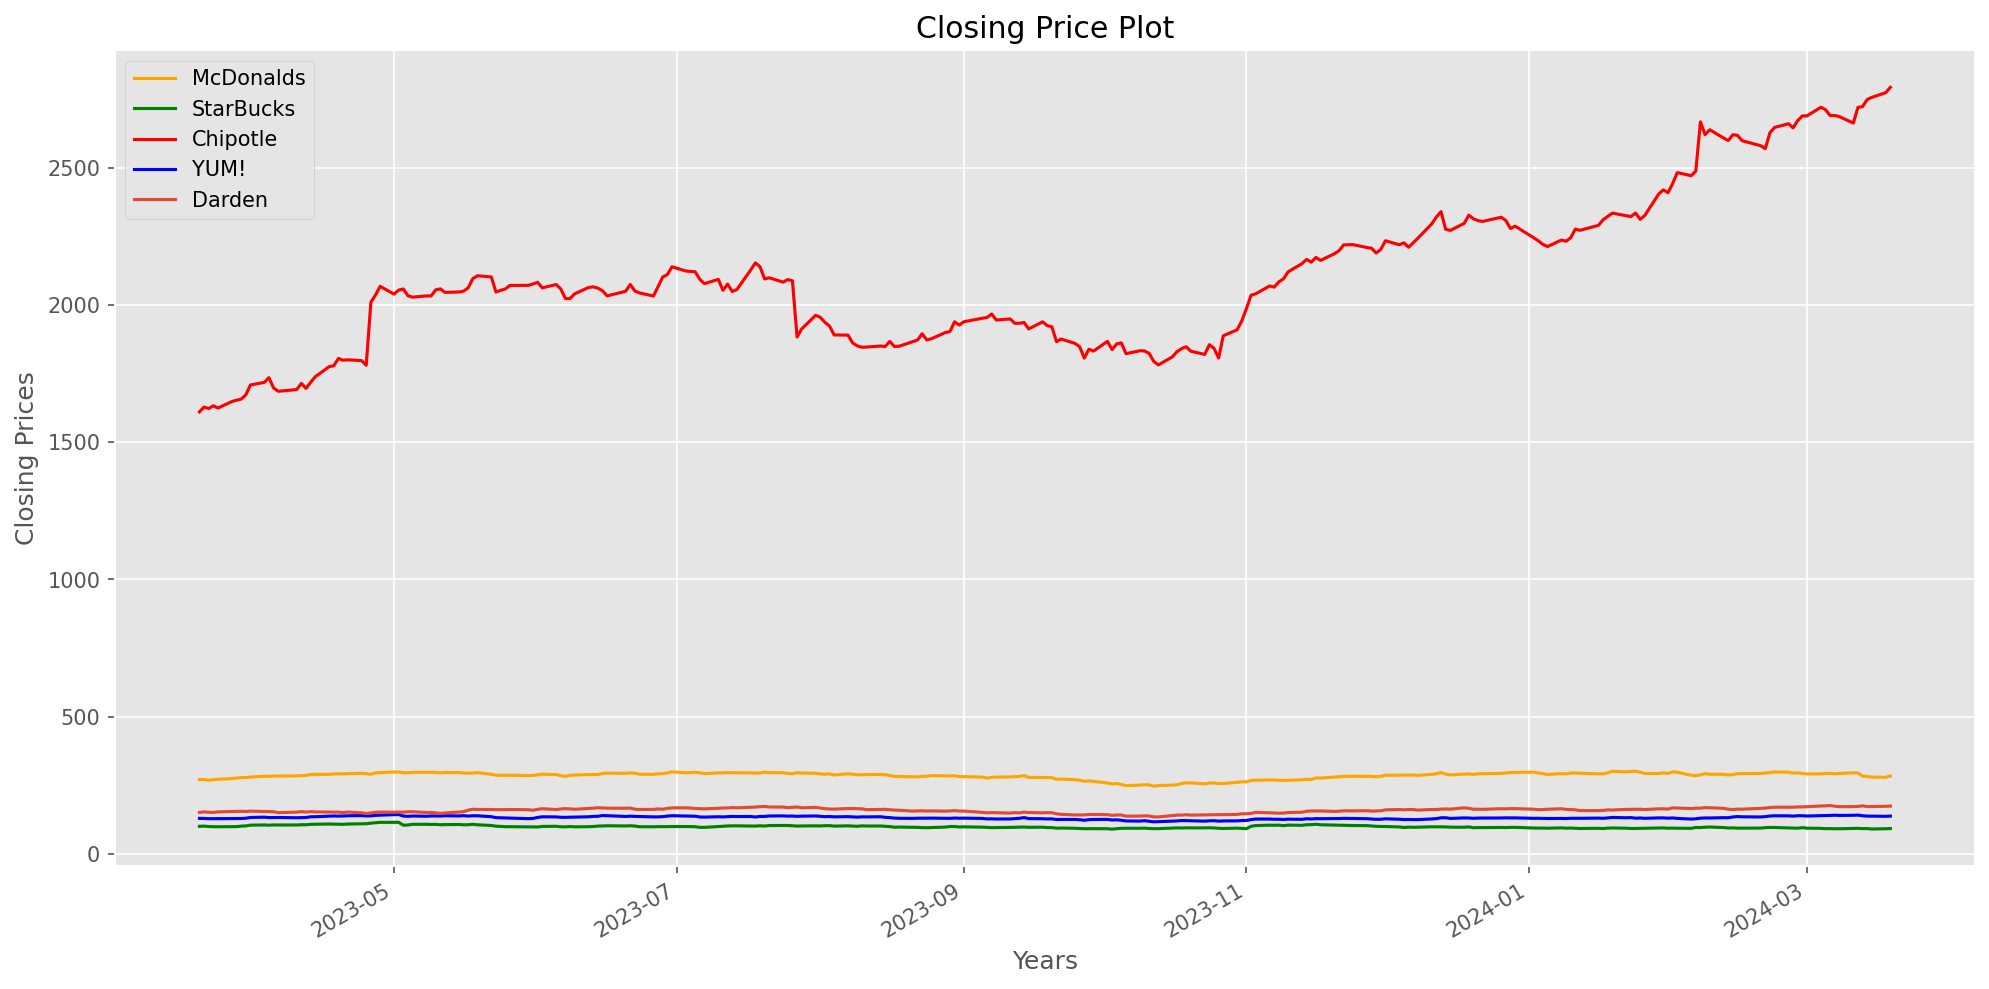

In [28]:
# Visualizing The closing price of all the stocks 
plt.style.use('ggplot') 
  
# setting the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
# using plot method to plot closing prices. 
# in plot method we set the label and color of the curve. 
MCD_data['Close'].plot(label='McDonalds', color='orange') 
SBUX_data['Close'].plot(label='StarBucks', color='green') 
CMG_data['Close'].plot(label='Chipotle', color='red') 
YUM_data['Close'].plot(label='YUM!', color='blue') 
DRI_data['Close'].plot(label='Darden') 
  
# adding title to the plot 
plt.title('Closing Price Plot') 
  
# adding Label to the x-axis 

plt.xlabel('Years') 
plt.ylabel('Closing Prices') 

# adding legend to the curve 
plt.legend(loc=2)
plt.show()

### The above plot displays the time series of the closing prices for each stock (MCD, SBUX, CMG, YUM, DRI) over a one year observed period. 

### Let us next take a closer look at each stock individually so we can make an accurate reading.

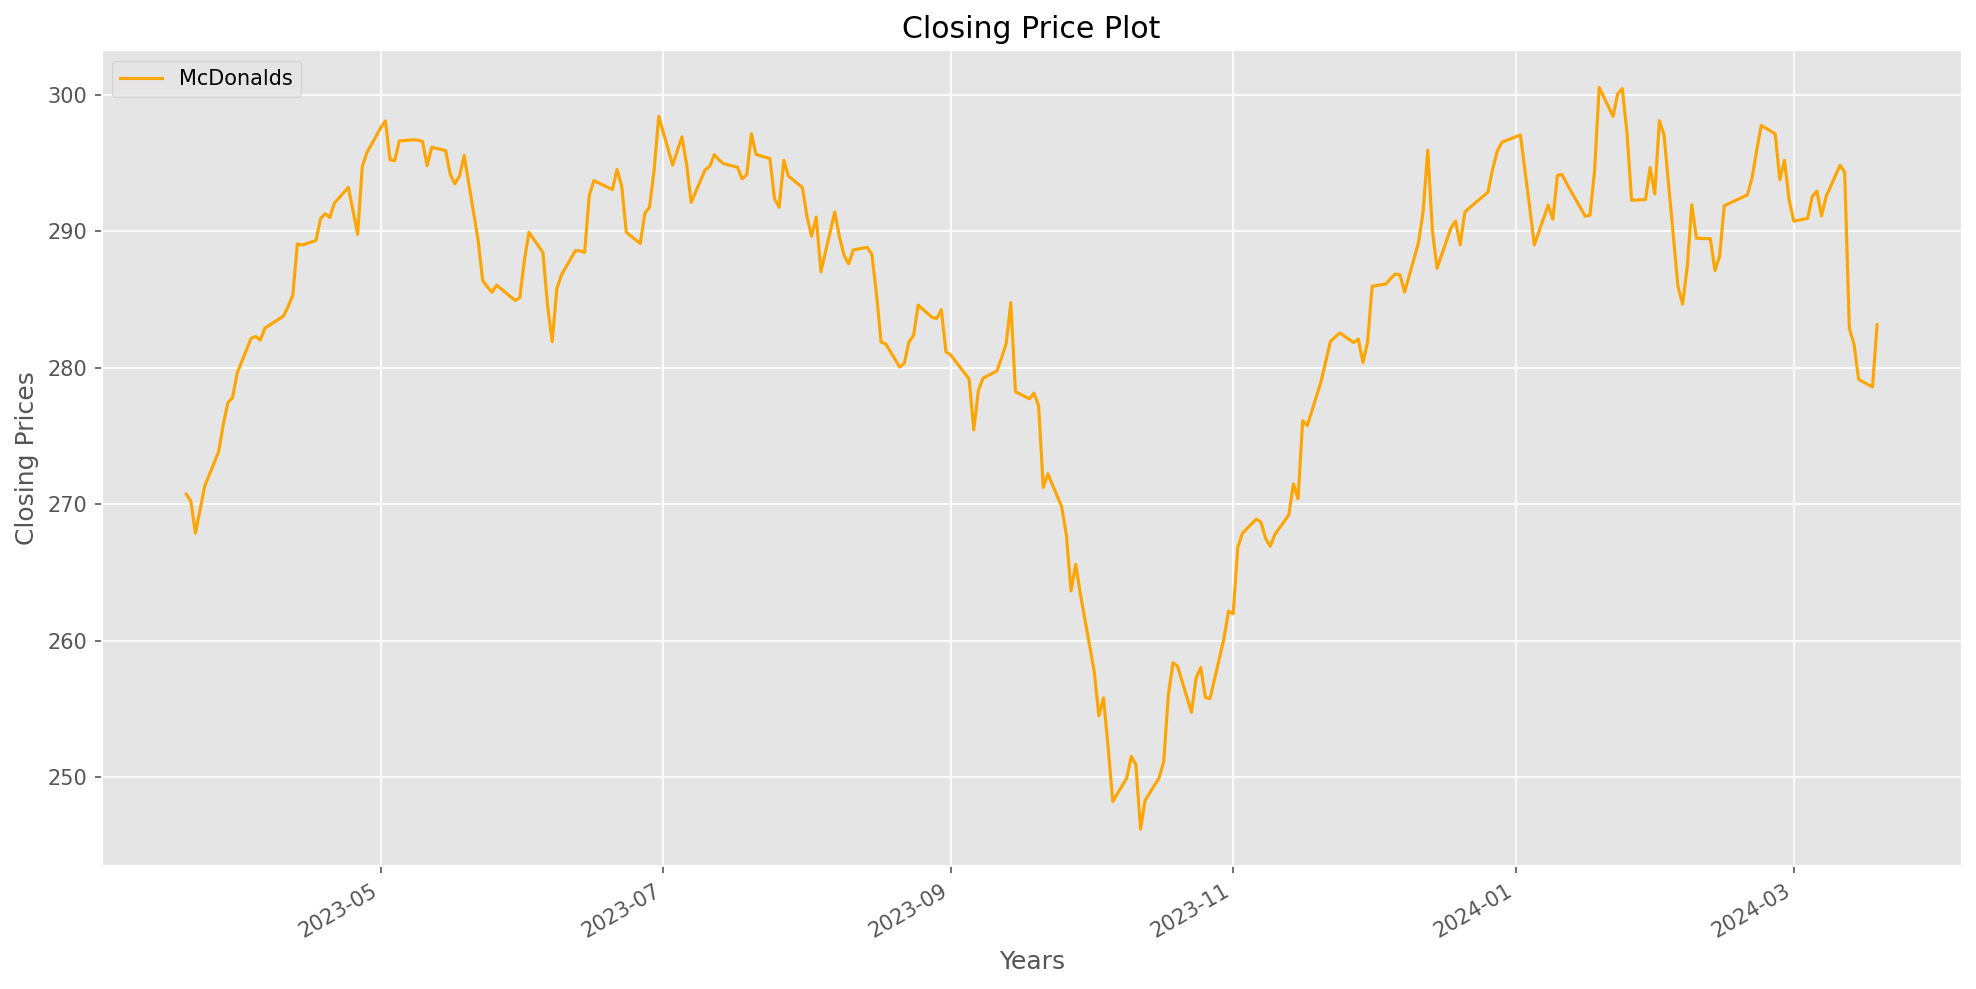

In [29]:
# Visualizing The closing price of each stock 
plt.style.use('ggplot') 
  
# setting the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
# using plot method to plot closing prices. 
# in plot method we set the label and color of the curve. 
MCD_data['Close'].plot(label='McDonalds', color='orange') 
  
# adding title to the plot 
plt.title('Closing Price Plot') 
  
plt.xlabel('Years') 
plt.ylabel('Closing Prices') 

# adding legend to the curve 
plt.legend(loc=2)
plt.show()

MCD (McDonald's Corportation):
- Q1 through Q22023 shows the stock price moving in an upward trend, then mid Q2 the price follows a sporadic sideways movement until begining of Q32023 where there is a trend reversal and the closing price follows a downward trend to the lowest price being <b>$246.19</b> on <b>10-12-2023</b>. There is a sudden trend reversal which continues upward into Q12024 and levels off into another sporadic sideways movement.

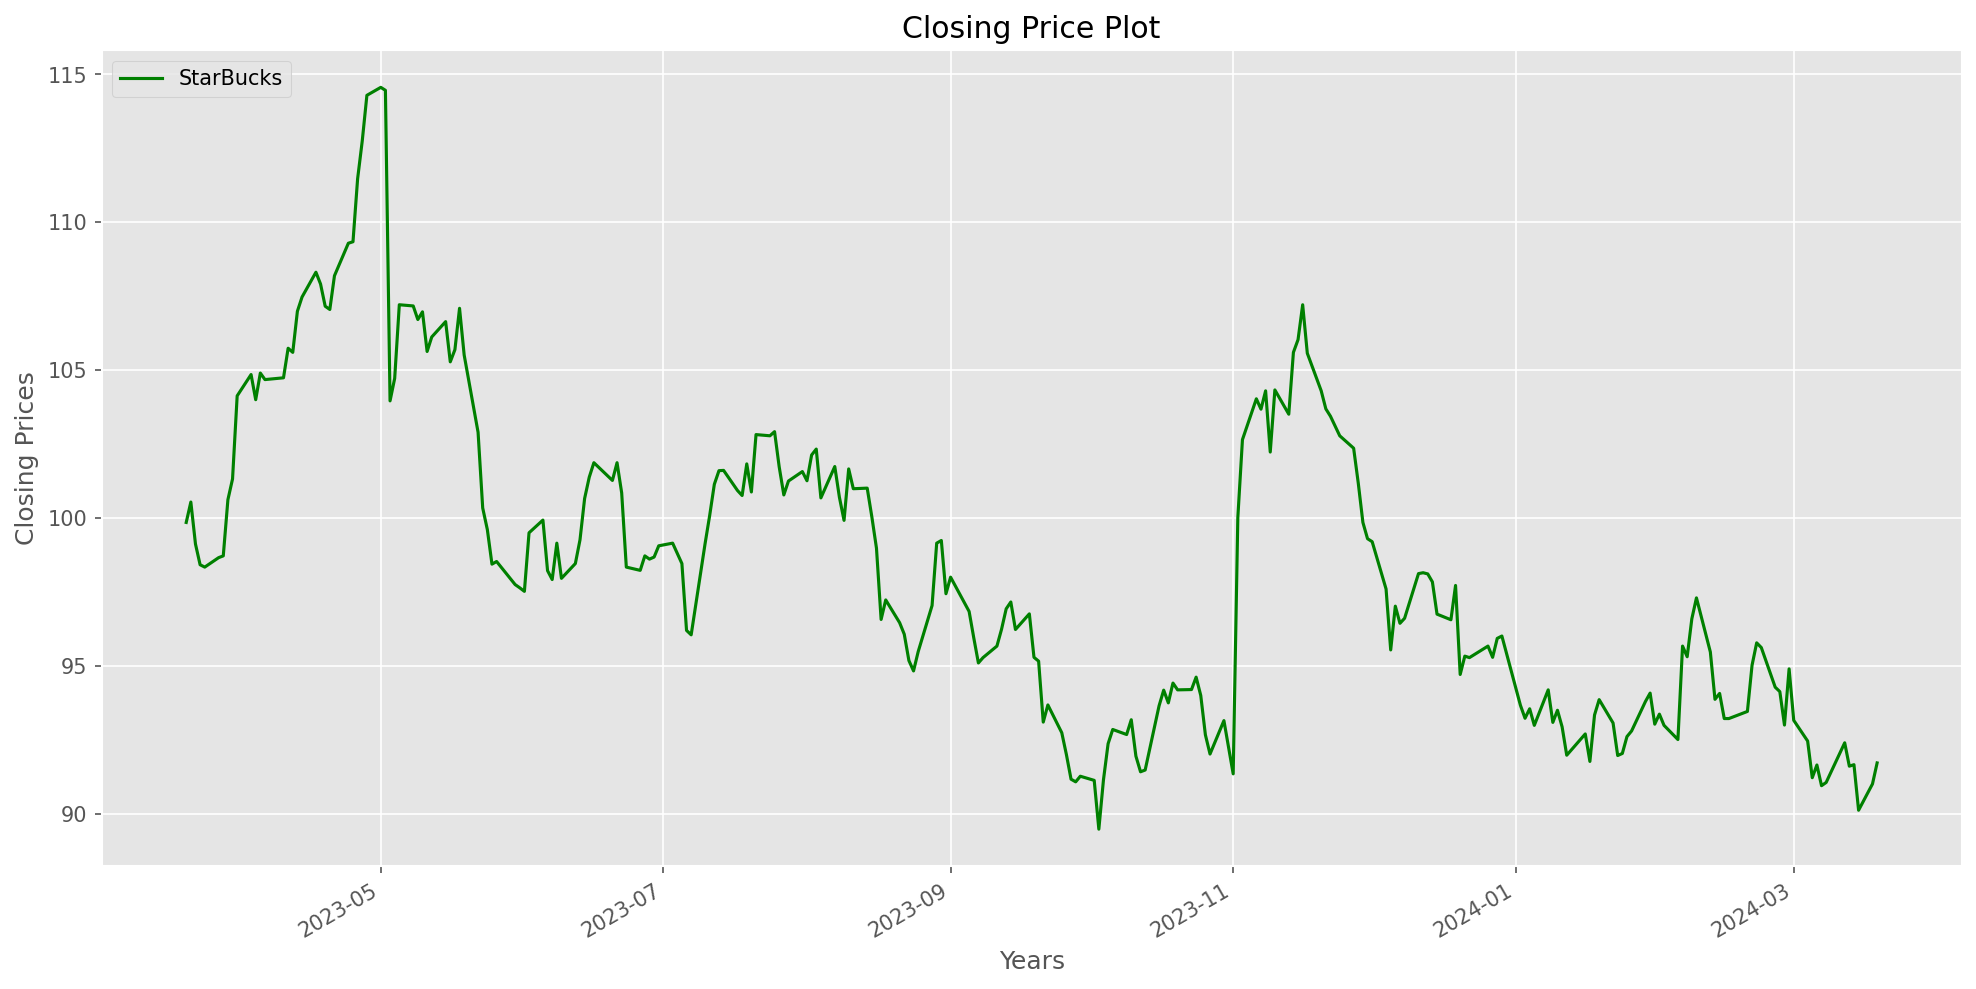

In [30]:
# Visualizing The closing price of each stock 
plt.style.use('ggplot') 
  
# setting the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
# using plot method to plot closing prices. 
# in plot method we set the label and color of the curve. 
SBUX_data['Close'].plot(label='StarBucks', color='green') 
  
# adding title to the plot 
plt.title('Closing Price Plot') 
  
plt.xlabel('Years') 
plt.ylabel('Closing Prices') 

# adding legend to the curve 
plt.legend(loc=2)
plt.show()

SBUX (Starbucks Corporation):
- Q1 through Q22023 shows the stock price gradually moving in an upward fluctuating trend until mid Q2 where there is a major trend reversal and the price follows a bearish market run with significant sideways movement until the lowest price is reached, that being <b>$89.48</b> on <b>10-03-2023</b>. There is a sudden trend reversal which continues slightly upward into Q42023, it continues until end of Q4 and the trend changes once more fluctuating downward into a sideways movement within Q12024.

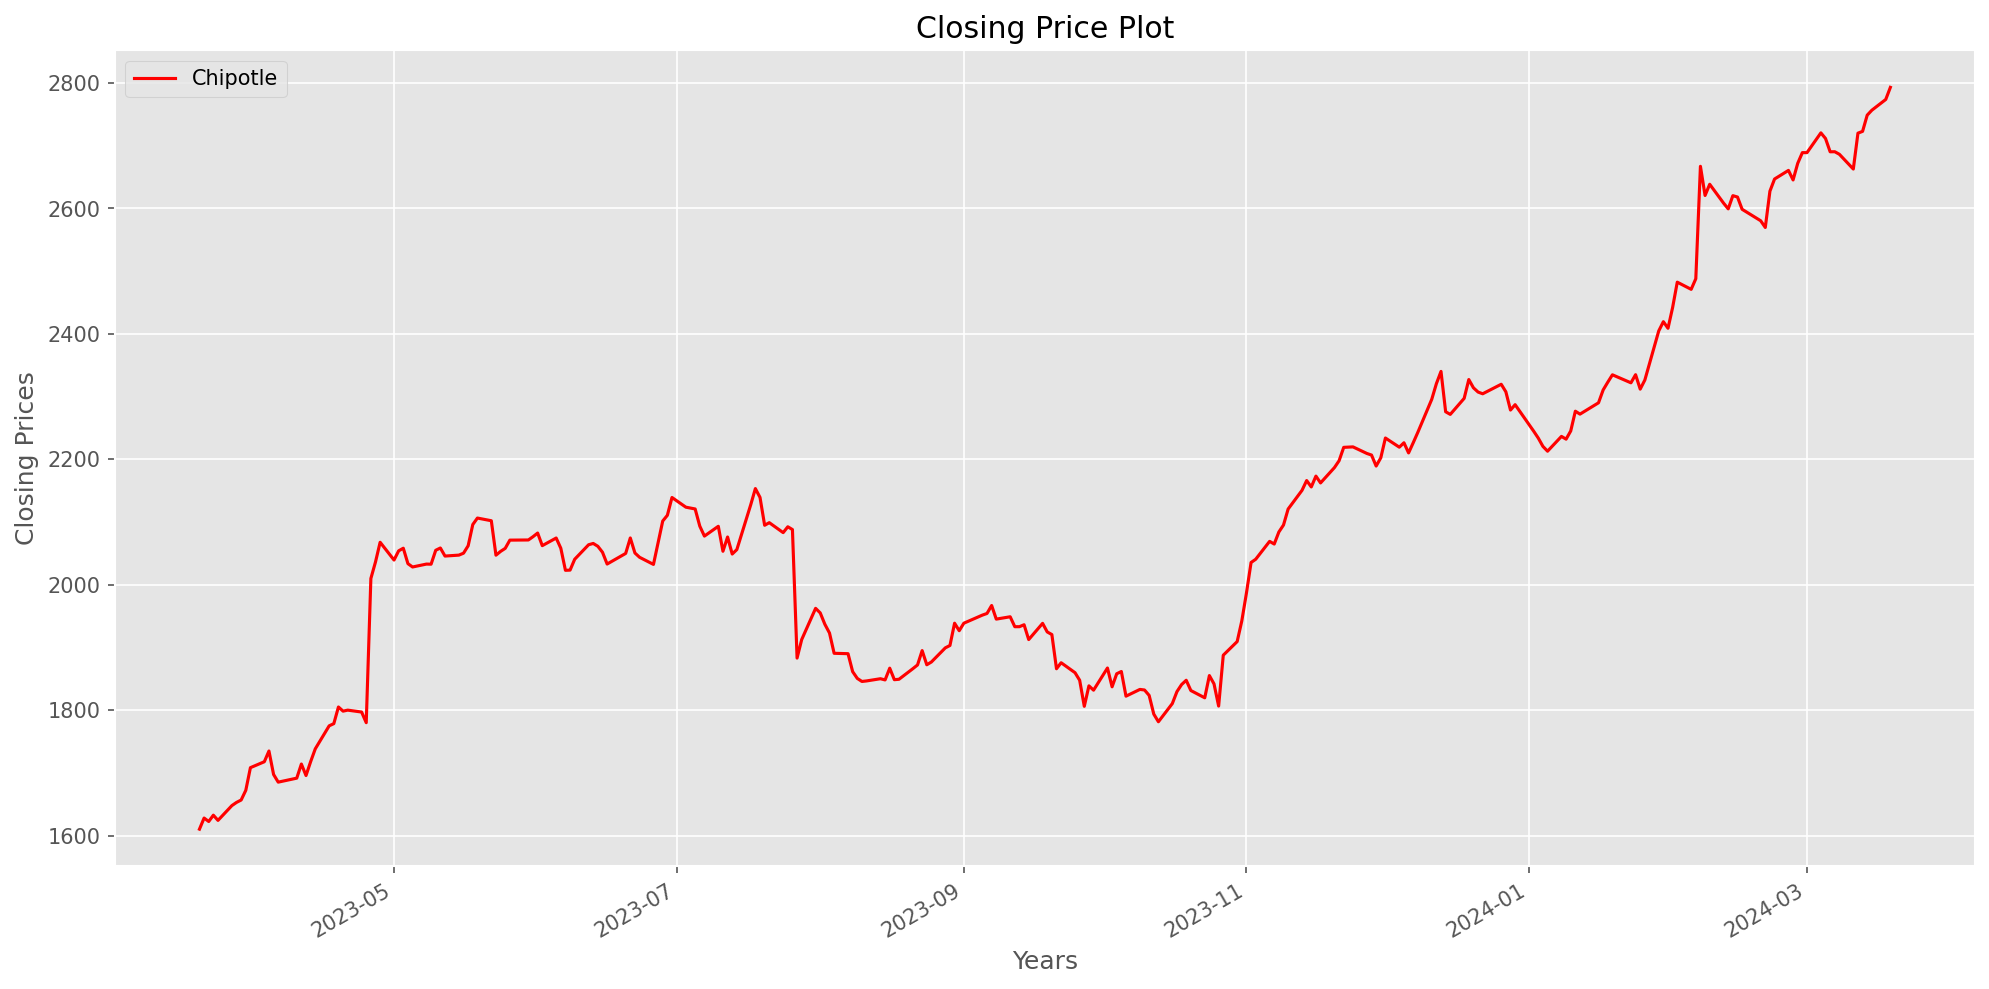

In [31]:
# Visualizing The closing price of each stock 
plt.style.use('ggplot') 
  
# setting the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
# using plot method to plot closing prices. 
# in plot method we set the label and color of the curve. 
CMG_data['Close'].plot(label='Chipotle', color='red') 
  
# adding title to the plot 
plt.title('Closing Price Plot') 
  
plt.xlabel('Years') 
plt.ylabel('Closing Prices') 

# adding legend to the curve 
plt.legend(loc=2)
plt.show()

CMG (Chipotle Mexican Grill Inc.):
- Q12023 starts out at the lowest closing price of the year being <b>$1610.23</b> on <b>3-20-2023</b>. The stock gradually follows an upward trend until Q22023 and soon experiences significant sideways movement until mid Q32023. The trend reverses and there is a sporadic down trend until Q42023, a sudden trend reversal follows with a gradual upward trend into Q12024.

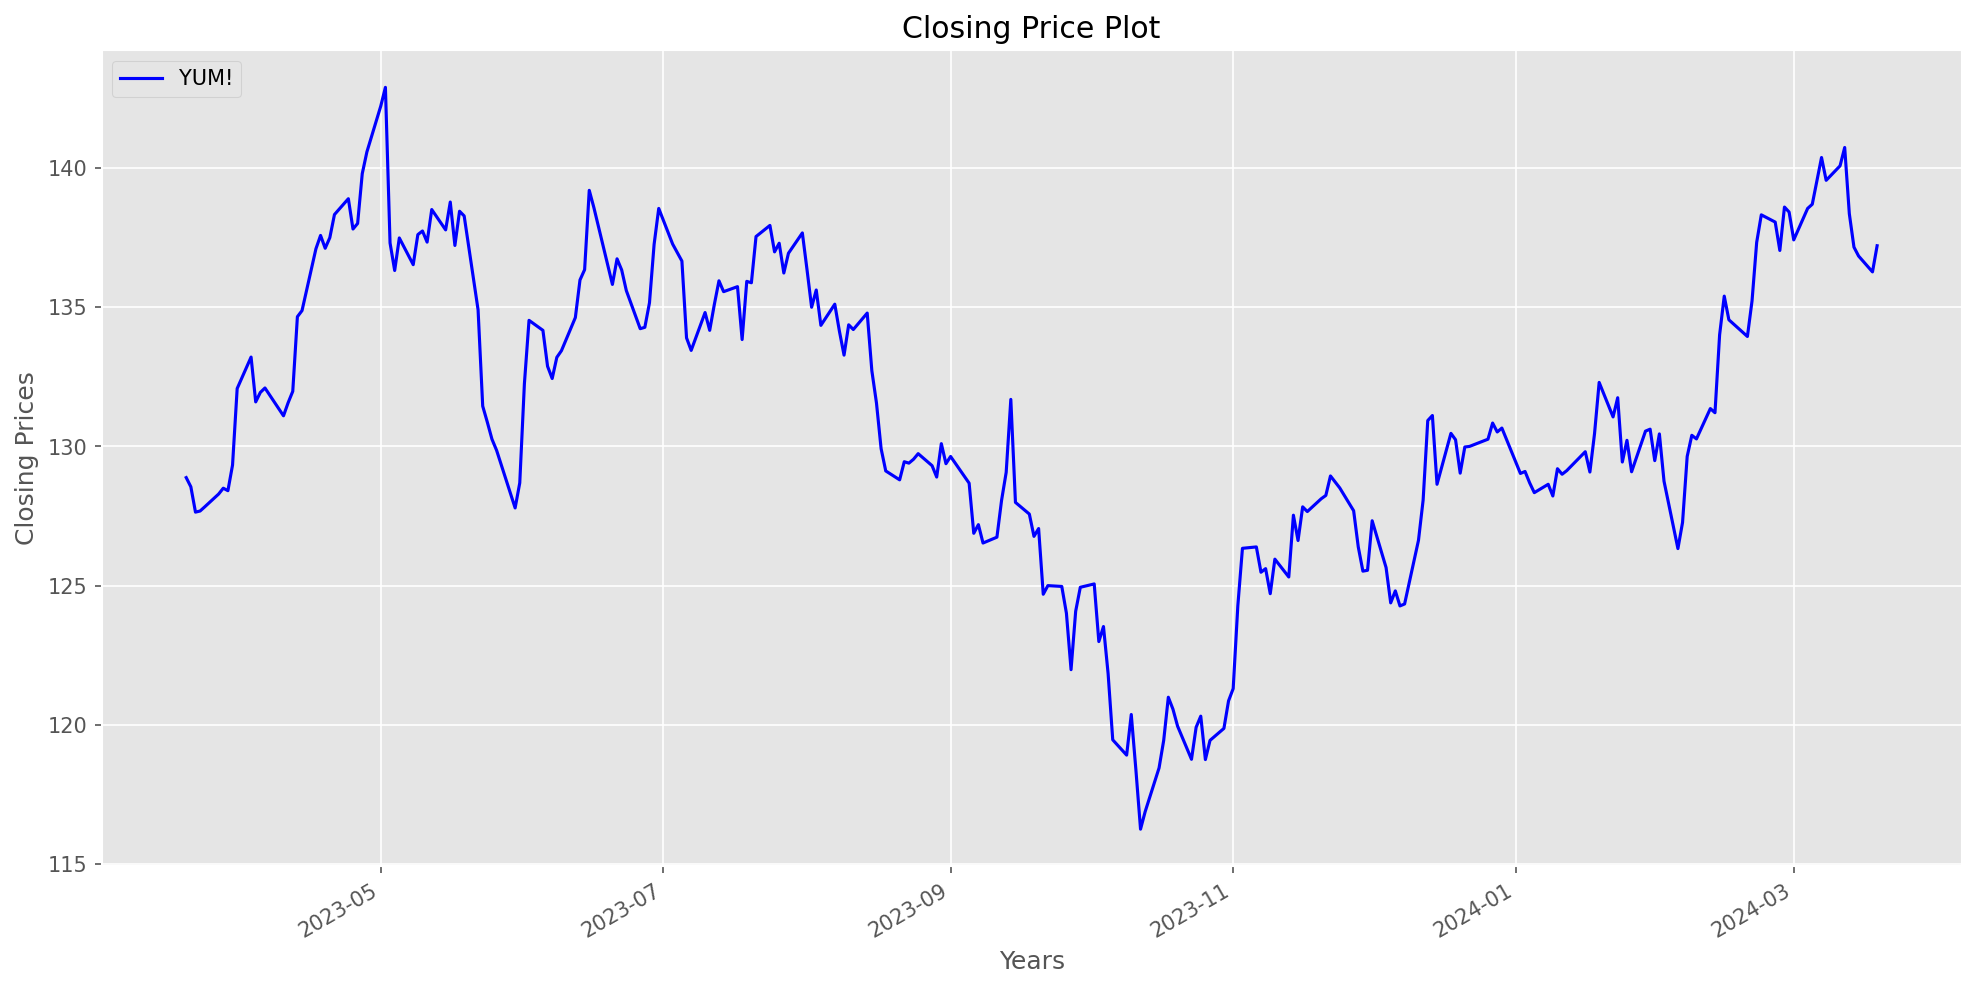

In [32]:
# Visualizing The closing price of each stock 
plt.style.use('ggplot') 
  
# setting the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
# using plot method to plot closing prices. 
# in plot method we set the label and color of the curve. 
YUM_data['Close'].plot(label='YUM!', color='blue') 
  
# adding title to the plot 
plt.title('Closing Price Plot') 
  
plt.xlabel('Years') 
plt.ylabel('Closing Prices') 

# adding legend to the curve 
plt.legend(loc=2)
plt.show()

YUM (Yum! Brands Inc.):
- Q1 through Q22023 shows the stock price gradually moving in an upward trend until mid Q2, there is a sudden trend reversal where price fluctuates in a downward trend to the lowest closing price being <b>$116.25</b> on <b>10-12-2023</b>. There is a another sudden trend reversal which shows continued fluctuation upward into Q12024.

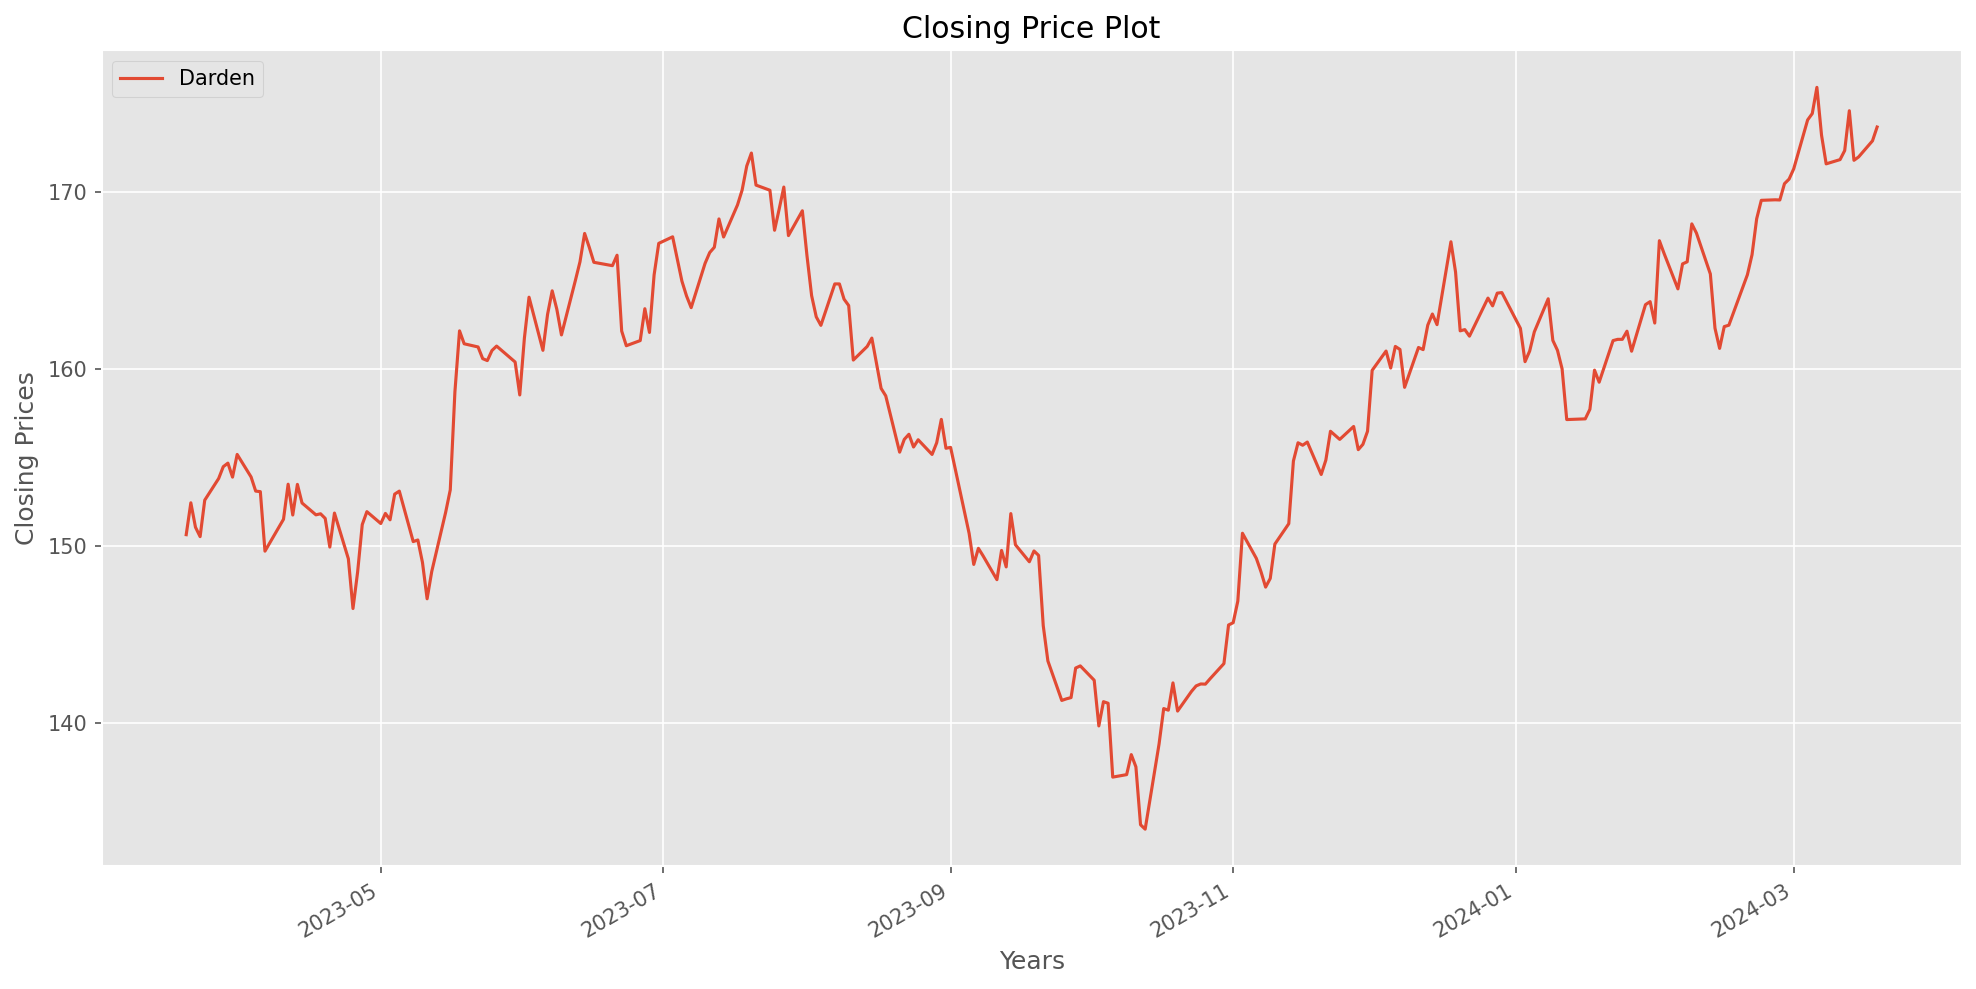

In [33]:
# Visualizing The closing price of each stock 
plt.style.use('ggplot') 
  
# setting the plot size 
plt.figure(figsize=(16, 8), dpi=150) 
# using plot method to plot closing prices. 
# in plot method we set the label and color of the curve. 
DRI_data['Close'].plot(label='Darden') 
  
# adding title to the plot 
plt.title('Closing Price Plot') 
  
plt.xlabel('Years') 
plt.ylabel('Closing Prices') 

# adding legend to the curve 
plt.legend(loc=2)
plt.show()

DRI (Darden Restaurants Inc.):
- Q1 through Q22023 shows the stock price following a downward sideways movement until end of Q2, were there is a trend reversal and the price fluctuates upward until mid Q32023. There is a trend reversal and the closing price follows a volatile downward trend until hitting lowest price, that being <b>$134</b> on <b>10-13-2023</b>. There is another trend reversal which takes place and the price steadily climbs upward into Q12024. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #4: </h1>
<b>Regarding the closing price for each stock, what are the trends and patterns over a one year timeframe and how do each compare?</b>
</div>

### Trend: 
 - MCD, YUM and DRI all experience their lowest closing prices in Q42023; 10-12-2023 for MCD and YUM, 10-13-2023 for DRI.
 - Each stock experienced a trend reversal in Q42023 which followed a sporadic upward trend into Q12024 except SBUX, which had another trend reversal end of Q42023           and closing prices fluctuated downward into a sideways movement within Q12024.

### Volatility:
- There is noticeable volatility in each of the stock prices. For example, CMG shows more pronounced fluctuations compared to all the others.

### Comparative Performance:
- When comparing the stocks, DRI, YUM and SBUX generally trade at price levels close in range as opposed to MCD which is a bit higher in price. CMG trades at a substancially higher price than all the other stocks in this dataset.


## Volatility Analysis

In [35]:
 pivot_data = restaurants.pivot(index='Date', columns='Ticker', values='Close')

# Volatility Analysis
 volatility = pivot_data.std().sort_values(ascending=False)


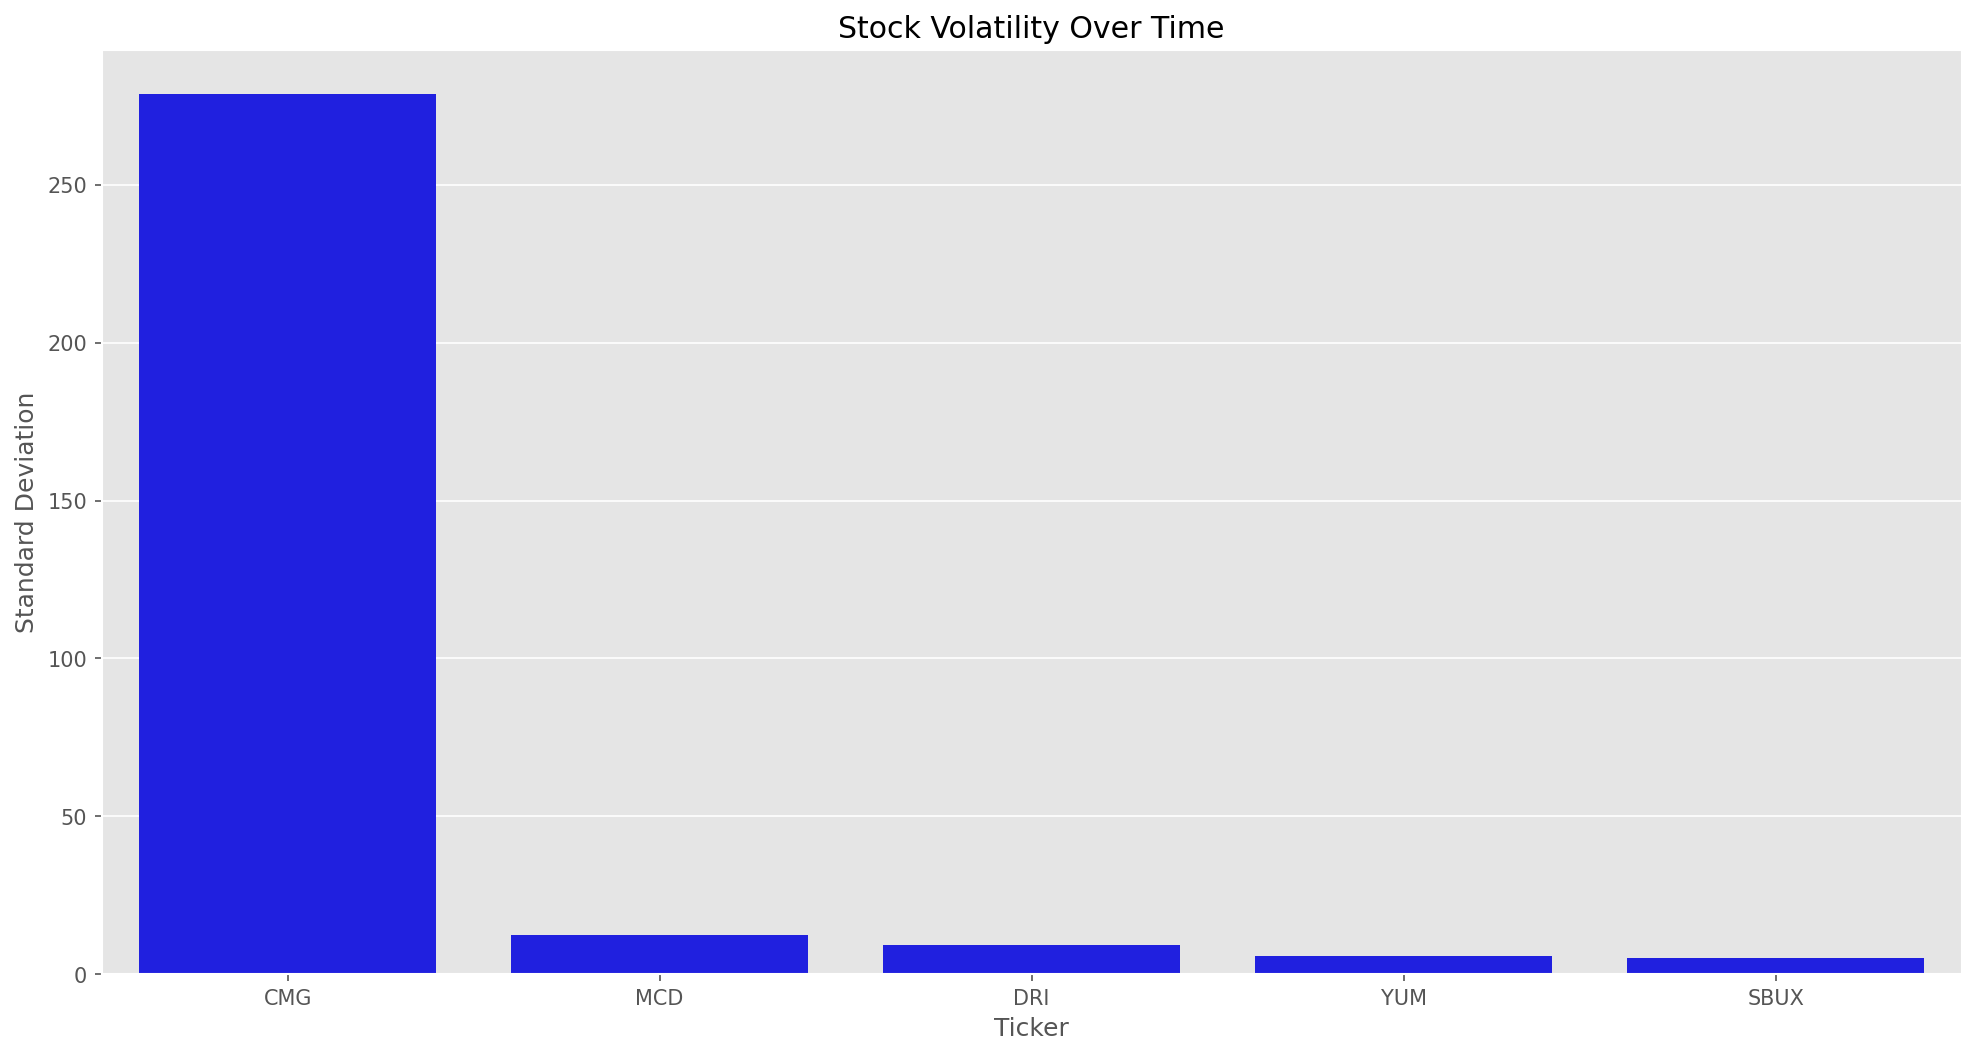

In [36]:
plt.figure(figsize=(16, 8), dpi=150)
sns.barplot(x=volatility.index, y=volatility, data=df, color='blue')
plt.title('Stock Volatility Over Time')
plt.xlabel('Ticker')
plt.ylabel('Standard Deviation')
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #5: </h1>
<b>The volatility of the closing price gives us insight into how much the stock price fluctuates over a one year period. How does each stock rank in terms of volatility and in comparrison with each other?</b>
</div>

CMG: Highest volatility with a standard deviation of approximately 275.90.<br>
MCD: Next highest, with a standard deviation of around 12.47.<br>
DRI: Volatility rating right after MCD, with a standard deviation of around 9.12.<br>
YUM: Slight volatility compared to others, with a standard deviation of about 5.61.<br>
SBUX: The least volatile in this set, with a standard deviation of approximately 5.21.<br>

In summary, CMG stock is more prone to price fluctuations during this period than compared to MCD, DRI, YUM and SBUX.<br>
YUM and SBUX closing prices are relatively steady, while DRI and MCD shows a bit more price changes.<br>

## Correlation Analysis

In [37]:
# Lets setup data into a matrix before we create a heatmap
pivot_data.corr()

Ticker,CMG,DRI,MCD,SBUX,YUM
Ticker,,,,,
CMG,1.00,0.67,0.45,-0.37,0.32
DRI,0.67,1.00,0.76,-0.06,0.67
MCD,0.45,0.76,1.00,0.29,0.81
SBUX,-0.37,-0.06,0.29,1.00,0.45
YUM,0.32,0.67,0.81,0.45,1.00


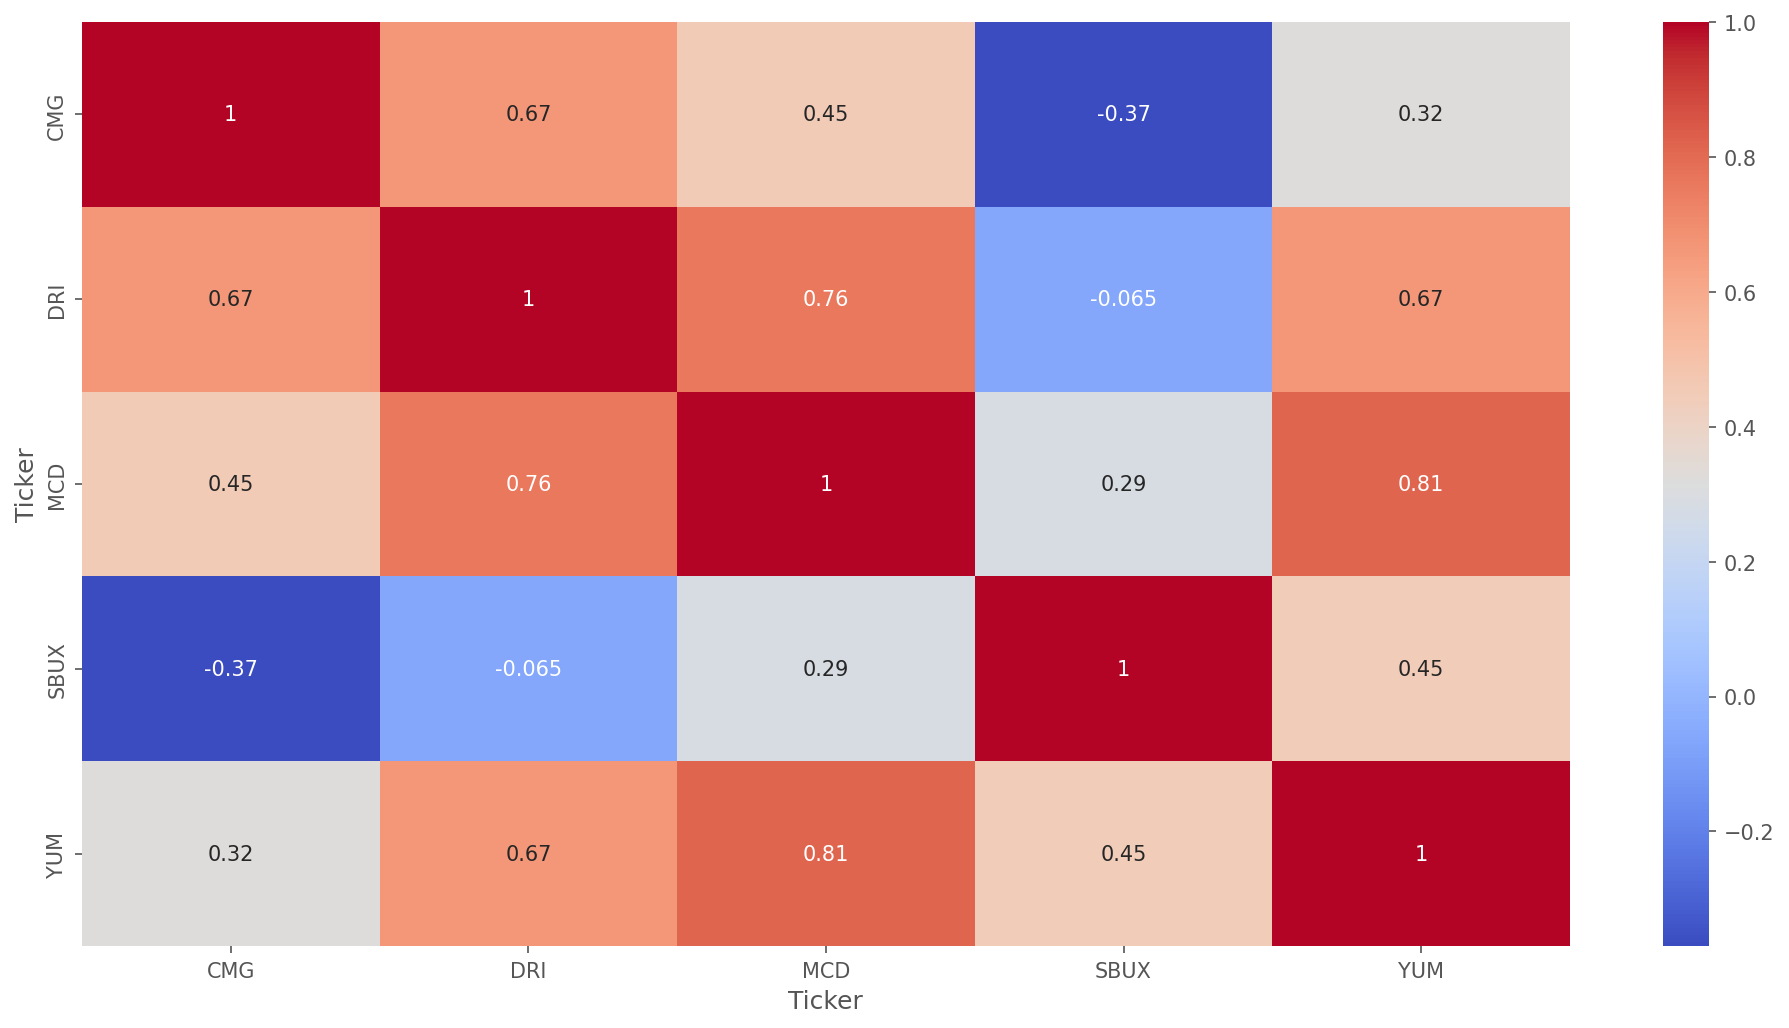

In [38]:
plt.figure(figsize=(16, 8), dpi=150)
sns.heatmap(pivot_data.corr(),cmap= 'coolwarm',annot=True)
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #6: </h1>
<b>The Correlation Analysis helps us understand how the stock prices of each company are related. What are the findings and what does this tell us?</b>
</div>

 From the heatmap, we can observe that there are varying degrees of positive and negative correlations between the stock prices, with some pairs showing stronger correlations than others.
- MCD and YUM have a relatively higher positive correlation than any other stocks (0.81).
- This makes perfect sense since both have very similar closing price trends and patterns over the past year. 

## Comparative Analysis

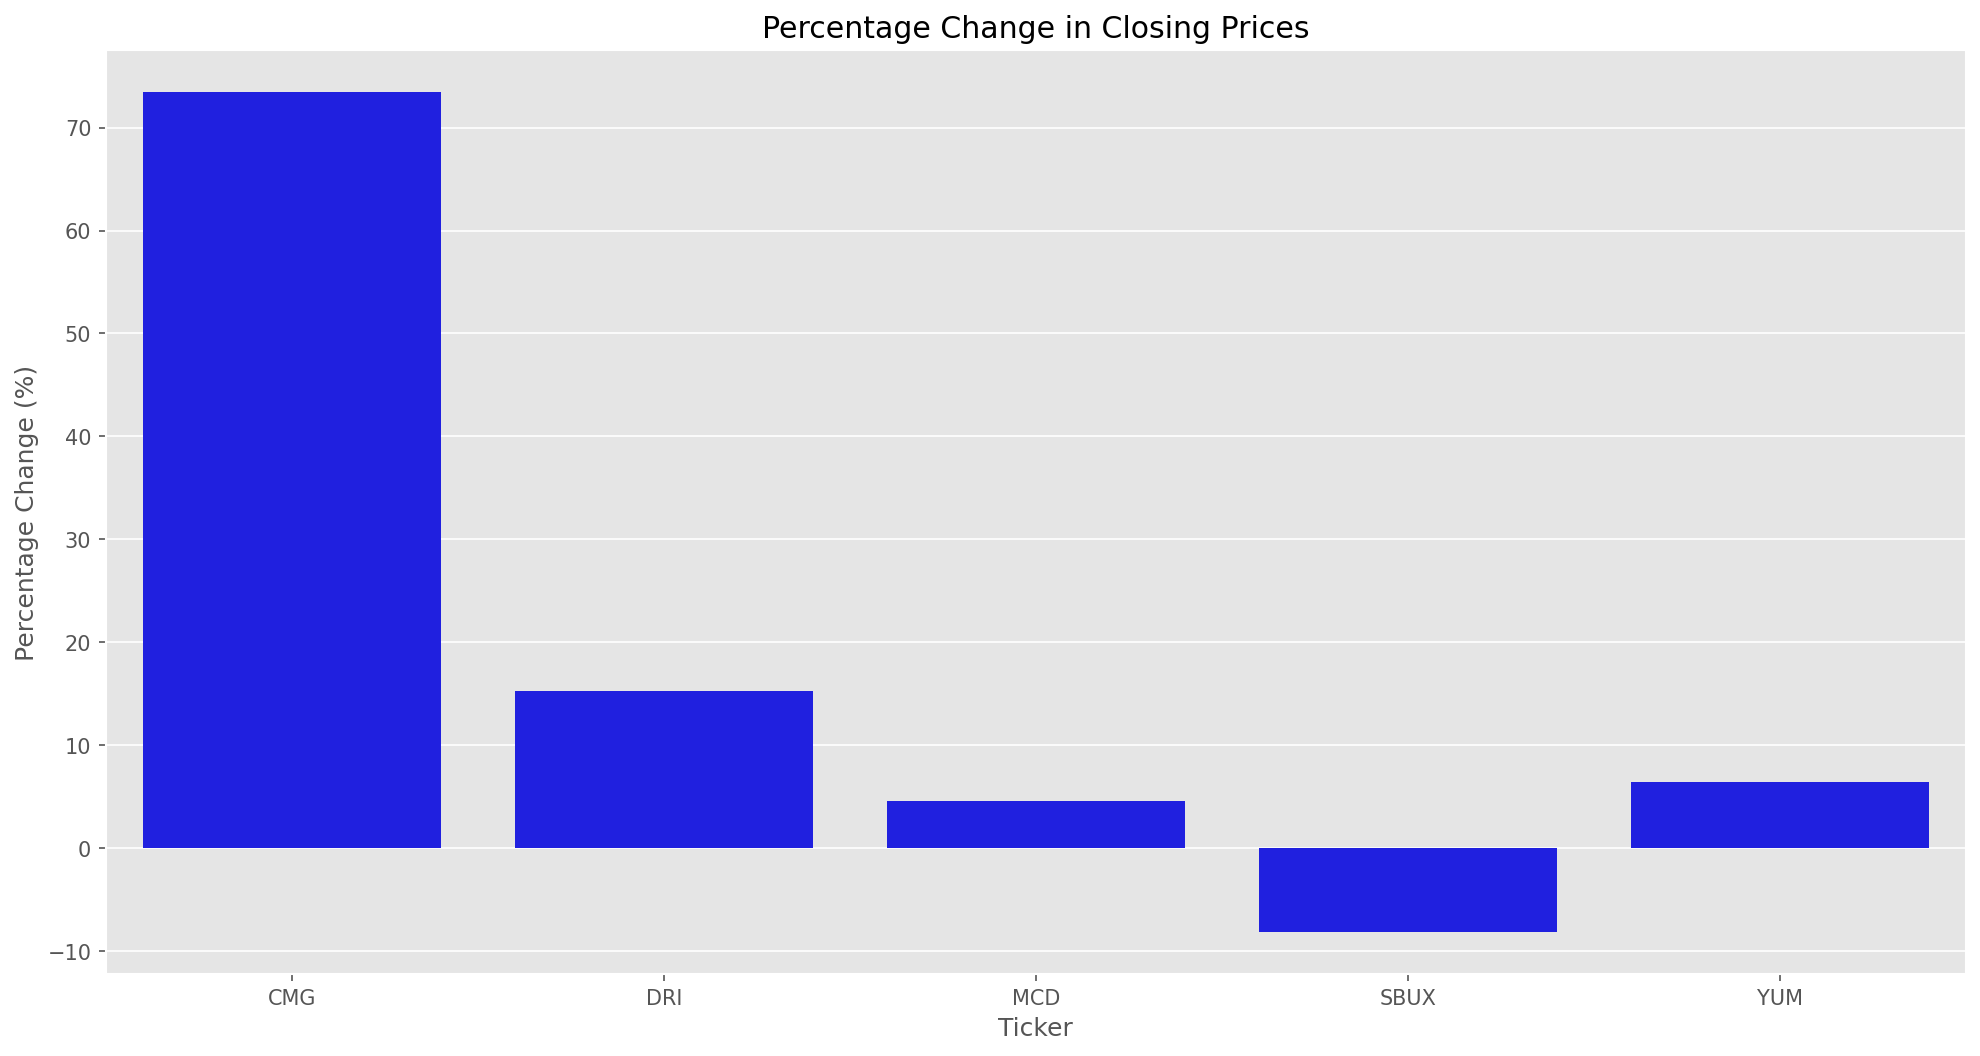

In [39]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100


plt.figure(figsize=(16, 8), dpi=150)
sns.barplot(x=percentage_change.index, y=percentage_change, data=df, color='blue')
plt.title('Percentage Change in Closing Prices')
plt.xlabel('Ticker')
plt.ylabel('Percentage Change (%)')
plt.show()


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #7: </h1>
<b>With Comparative Analysis we can compare the performance of different stocks based on their returns over a one year period. What is the percentage change in closing prices of each stock and how do they compare with each other?</b>
</div>

CMG: The highest positive change of approximately 79.05%.<br>
DRI: Exhibited a positive change of approximately 8.07%.It indicates a solid performance.<br>      
MCD: Exhibited a positive change of approximately 5.85%.It also indicates a solid performance, though slightly lower than DRI.<br>
SBUX: Experienced the most significant negative change, at approximately -7.53%. It suggests a notable decrease in its stock price during a one year period.<br>
YUM: Exhibited a positive change of approximately 7.00%. It indicates a solid performance, slightly lower than DRI but higher than MCD.<br>


## Daily Risk Vs. Return Analysis

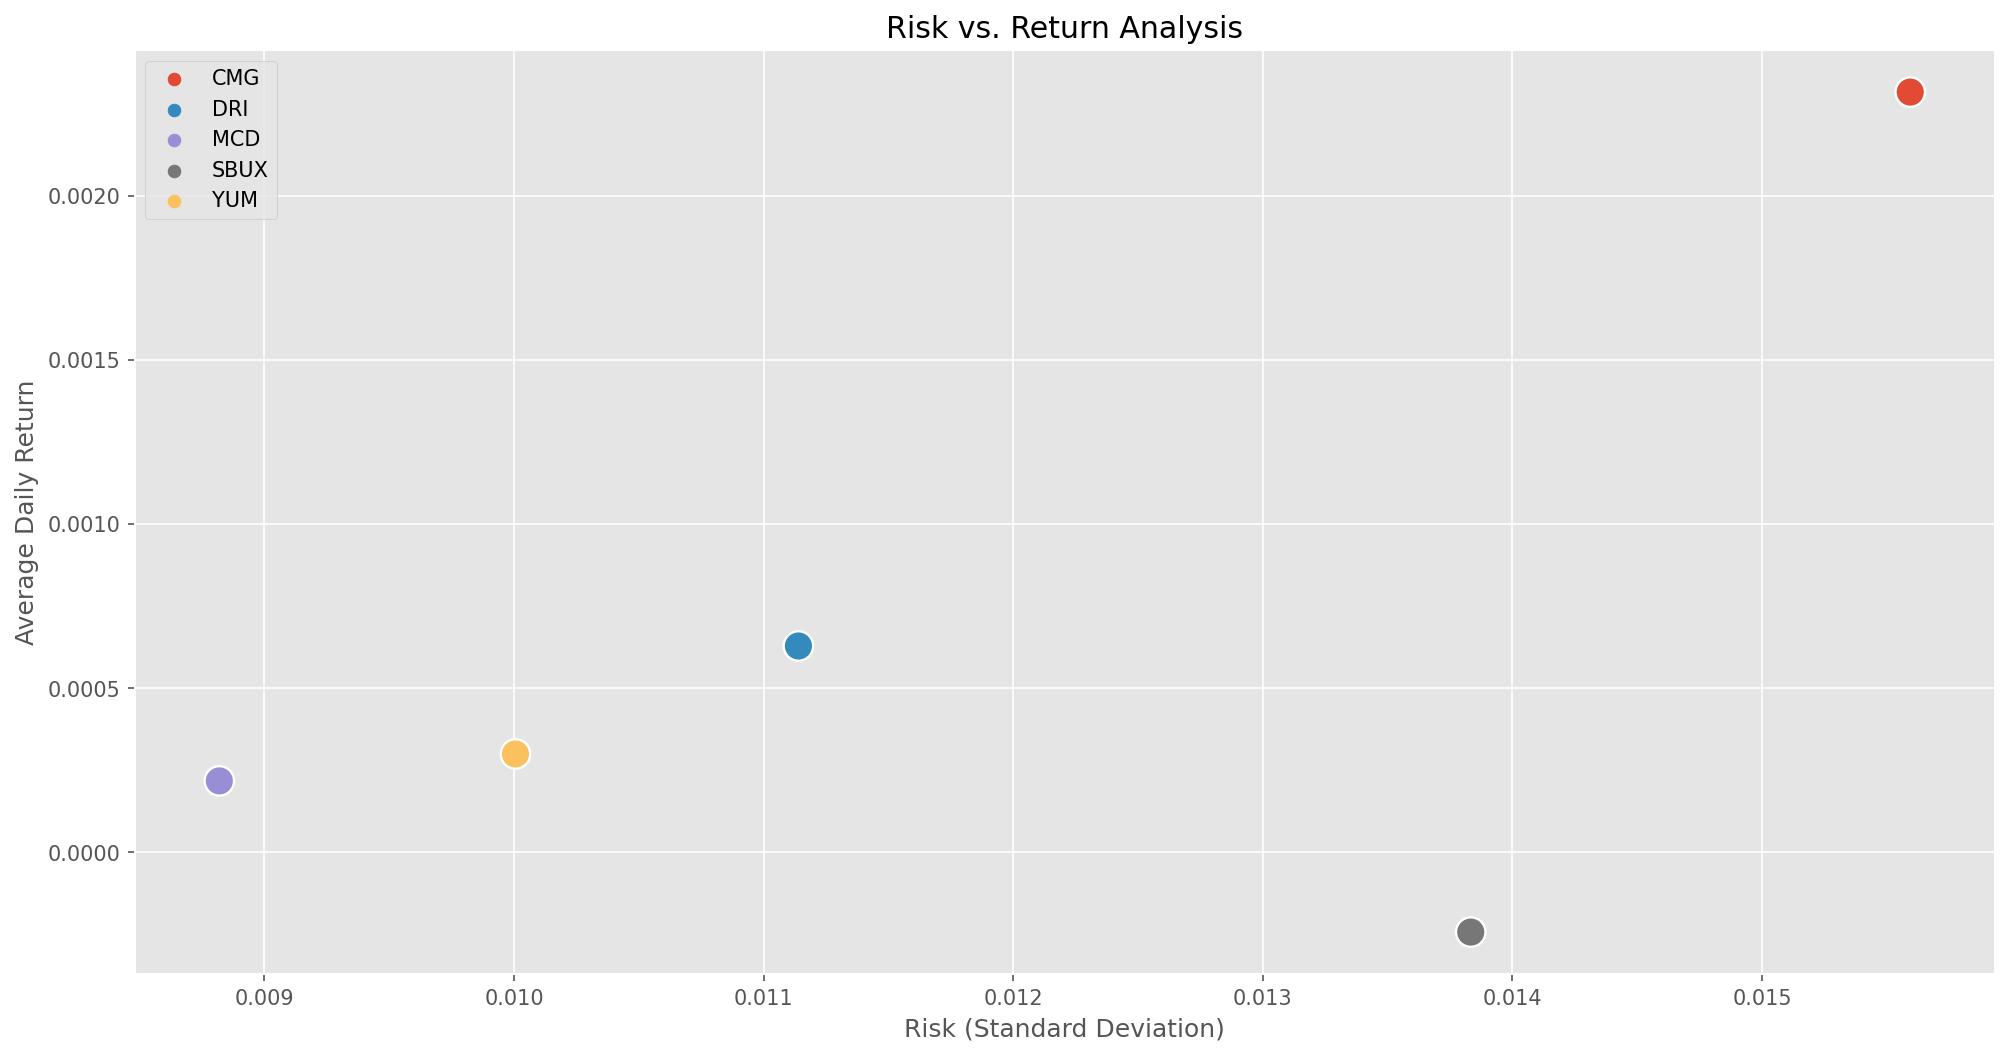

In [40]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

plt.figure(figsize=(16, 8), dpi=150)
# Add scatter plot points
sns.scatterplot(data=risk_return_df, x=risk_return_df['Risk'], y=risk_return_df['Average Daily Return'],s=200, hue=risk_return_df.index)

# Update layout
plt.title('Risk vs. Return Analysis')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Average Daily Return')
plt.legend(loc=2)
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #8: </h1>
<b>With the Risk-Return Trade-off Analysis stocks with higher average returns and lower risk are generally more desirable, but investment decisions often depend on the investor’s risk tolerance. What is the risk associated with each stock and how do they compare with each other?</b>
</div>

- MCD: shows the lowest risk combined with a positive average daily return, suggesting a more stable investment with consistent returns.
- YUM: has a slightly higher volatility and daily returns than MCD, showing slightly more of a reward in investment.
- DRI: shows moderate risk with the second highest average daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to MCD and YUM.
- SBUX: exhibits the second highest risk and has a negative average daily return, indicating a riskier and less rewarding investment during this period.
- CMG: exhibits the highest risk but has the highest average daily return, indicating it was the most volatile but provided the most rewarding investment among these stocks over the analyzed period.


## Performance of Stocks against the S&P 500

In [41]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)  # S&P 500 index as the market benchmark

# Calculate daily returns for both stocks and the market
MCD_data['Daily_Return'] = MCD_data['Adj Close'].pct_change()
SBUX_data['Daily_Return'] = SBUX_data['Adj Close'].pct_change()
CMG_data['Daily_Return'] = CMG_data['Adj Close'].pct_change()
YUM_data['Daily_Return'] = YUM_data['Adj Close'].pct_change()
DRI_data['Daily_Return'] = DRI_data['Adj Close'].pct_change()
market_data['Daily_Return'] = market_data['Adj Close'].pct_change()

# Calculate Beta for each stock
cov_MCD = MCD_data['Daily_Return'].cov(market_data['Daily_Return'])
var_market = MCD_data['Daily_Return'].var()

beta_MCD = cov_MCD / var_market

cov_SBUX = SBUX_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_SBUX = cov_SBUX / var_market

cov_CMG = CMG_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_CMG = cov_CMG / var_market

cov_YUM = YUM_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_YUM = cov_YUM / var_market

cov_DRI = DRI_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_DRI = cov_DRI / var_market


# Print the conclusion
print("Beta for McDonalds:", beta_MCD)
print("Beta for Starbucks:", beta_SBUX)
print("Beta for Chipotle:", beta_CMG)
print("Beta for Yum!:", beta_YUM)
print("Beta for Darden:", beta_DRI)

[*********************100%%**********************]  1 of 1 completed

Beta for McDonalds: -0.022100134415673232
Beta for Starbucks: 0.06466871902199274
Beta for Chipotle: 0.0126799097987679
Beta for Yum!: -0.026364338887540854
Beta for Darden: 0.07123452193728692


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #9: </h1>
<b>Regarding the performance of each stock in comparisson to the S&P 500, what are their beta values and what does that number mean in comparison to the market movements?</b>
</div>

>note: A beta greater than 1 suggests that a stock tends to be more volatile than the market. 


In the above code, we are assessing how sensitive McDonalds, Starbucks, Chipotle, Yum and Darden stocks are to overall market movements, providing insights into their relative volatility and risk about the broader U.S. stock market represented by the S&P 500 index.

The beta value for McDonalds is approximately -0.02210,-2.21% more volatile or sensitive to market movements.<br>
The beta value for Starbucks is approximately 0.06466, 6.47% more volatile or sensitive to market movements.<br>
The beta value for Chipotle is approximatley 0.01268, 1.27% more volatile or sensitive to market movements.<br>
The beta value for Yum is approximatly -0.02636, -2.64% more volatile or sensitive to maket movements.<br>
The beta value for Darden is 0.07123, 7.12% more volatile or sensitive to market movements.<br>

 ### Summary:
 
- Starbucks, Chipotle and Darden all have beta values less than 1, indicating that they are expected to be less volatile and sensitive to market movements.
- McDonalds and Yum both have negative values which suggest they move in opposite direction to overall market movements.</b>


>note:  Although rare, there are some stocks in the market that have a negative beta<br>


# Results from Findings
---
As a reminder, I will be making a determination of a wonderful stock to pick from the viewpoint of an investor who is risk averse.

 After performing a Quatitative Analysis of five well known stocks in the restaurant industry; (MCD) McDonalds, 
(SBUX) Starbucks, (CMG) Chipotle Mexican Grill, (YUM) Yum! Brands and (DRI) Darden Restaurants, within a one year time period of 3-20-2023 through 3-19-2024, the data shows that <b>(DRI) Darden Restaurants</b> would be the best choice.


  Factors which helped in the decision process were outcomes from the below statistical concepts:
 
 - <b>Comparative Analysis:</b>    Out of all five stocks we looked at SBUX experienced the most significant negative change, at approximately -7.53%.
  This left us with four stocks to analyze.

 - <b>Risk-Return Trade-off Analysis:</b>  CMG exhibited the highest risk out of all the stocks though having the highest average daily return.
  We would have to remove this stock from the lineup, leaving us with three.

 - <b>Performance against the S&P500:</b>  MCD and Yum both have negative values which suggest they move in opposite direction to overall market movements.
    For some, both stocks might be good because they act as a hedge against market downturns and can help reduce portfollio risks. For the average investor looking to make daily returns this might be a market risk. 
    This leaves us with DRI as the wonderful stock to purchase; beta value is 0.07123 which is far below a beta of 1.
